##**Non Graded Challenge 3**

By : Muhammad Rizki Herfian

Materi : SQL

#**Training SQL :**

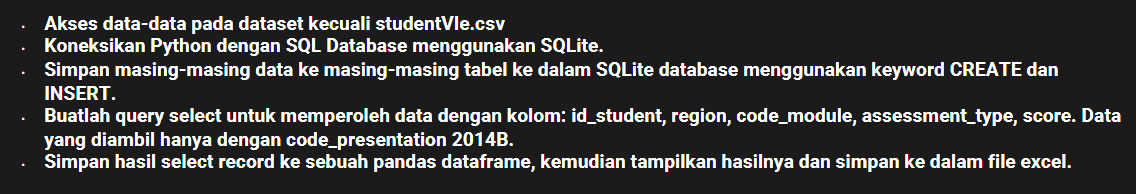

#**STEP 1 :**
###Import library yang dibutuhkan terutama library sqlite3 untuk pengoperasian SQL di Python.

In [1]:
import pandas as pd
import numpy as np
import sqlite3
from sqlite3 import Error

###Kemudian membuat function SQL untuk connection, query dan select dengan perintah seperti dibawah ini.

In [2]:
def create_connection(path):
    "function untuk connect ke database"
    connection = sqlite3.connect(path)
    return (connection)

connection = create_connection("db_ng3.sqlite")

In [3]:
def execute_query(conn,query):
    "execute query NON SELECT"
    cur = conn.cursor()
    cur.execute(query)
    conn.commit()

In [4]:
def select_query(conn,query):
    "execute query SELECT"
    cur = conn.cursor()
    cur.execute(query)
    rows = cur.fetchall()
    
    for row in rows:
        print(row)

#**STEP 2:**
###Setelah berhasil membuat function langkah berikutnya adalah membuat table dengan perintah CREATE, disini ada 6 table yang akan dibuat sesuai dengan 6 data yang akan digunakan, berikut proses pembuatab table.

In [5]:
assessments_table='''
CREATE TABLE assessments (
    code_module varchar(25),
    code_presentation varchar(25),
    id_assessment INTEGER PRIMARY KEY,
    assessment_type varchar(25),
    date date,
    weight float 
);
'''

execute_query(connection,assessments_table)

In [6]:
courses='''
CREATE TABLE courses (
    id_courses INTEGER PRIMARY KEY AUTOINCREMENT,
    code_module varchar(25),
    code_presentation varchar(25),
    module_presentation_length INTEGER
);
'''

execute_query(connection,courses)

In [7]:
vle='''
CREATE TABLE vle (
    id_site INTEGER PRIMARY KEY,
    code_module varchar(25),
    code_presentation varchar(25),
    activity_type varchar(25),
    week_from INTEGER,
    week_to INTEGER 
);
'''

execute_query(connection,vle)

In [8]:
student_info='''
CREATE TABLE studentInfo (
    code_module varchar(25),
    code_presentation varchar(25),
    id_student INTEGER PRIMARY KEY,
    gender char(1),
    region varchar(25),
    highest_education varchar (25),
    imd_band varchar(25),
    age_band varchar(25),
    num_of_prev_attempts INTEGER,
    studied_credits INTEGER,
    disability char(1),
    final_result varchar(25)
);
'''

execute_query(connection,student_info)

In [9]:
student_regist='''
CREATE TABLE studentRegistration (
    code_module varchar(5),
    code_presentation varchar(5),
    id_student INTEGER,
    date_registration INTEGER,
    date_unregistration INTEGER,
    FOREIGN KEY (id_student) 
      REFERENCES studentInfo (id_student)
);
'''

In [10]:
student_assessment='''
CREATE TABLE studentAssesment (
    id_assessment INTEGER,
    id_student INTEGER PRIMARY KEY,
    date_submitted INTEGER,
    is_banked INTEGER,
    score INTEGER,
    FOREIGN KEY (id_assessment) REFERENCES assessments (id_assessment)
    FOREIGN KEY (id_student) REFERENCES studentInfo (id_student)
);
'''

execute_query(connection,student_assessment)

#**STEP 3:**
###Setelah berhasil membuat table langkah berikutnya adalah mengisi isi masing-masing table dengan perintah INSERT table, sebelum itu import file /data csv di local komputer ke dalam google collabs untuk diolah menjadi datafram pandas.

In [11]:
df_assessments = pd.read_csv("assessments.csv")
df_courses = pd.read_csv("courses.csv")
df_studentAssessment = pd.read_csv("studentAssessment.csv")
df_studentInfo = pd.read_csv("studentInfo.csv")
df_studentRegistration = pd.read_csv("studentRegistration.csv")
df_vle = pd.read_csv(r"vle.csv")

df_assessments

,code_module,code_presentation,id_assessment,assessment_type,date,weight
0,AAA,2013J,1752,TMA,19.0,10.0
1,AAA,2013J,1753,TMA,54.0,20.0
2,AAA,2013J,1754,TMA,117.0,20.0
3,AAA,2013J,1755,TMA,166.0,20.0
4,AAA,2013J,1756,TMA,215.0,30.0
...,...,...,...,...,...,...
201,GGG,2014J,37443,CMA,229.0,0.0
202,GGG,2014J,37435,TMA,61.0,0.0
203,GGG,2014J,37436,TMA,124.0,0.0
204,GGG,2014J,37437,TMA,173.0,0.0


In [12]:
df_assessments.head(10)

,code_module,code_presentation,id_assessment,assessment_type,date,weight
0,AAA,2013J,1752,TMA,19.0,10.0
1,AAA,2013J,1753,TMA,54.0,20.0
2,AAA,2013J,1754,TMA,117.0,20.0
3,AAA,2013J,1755,TMA,166.0,20.0
4,AAA,2013J,1756,TMA,215.0,30.0
5,AAA,2013J,1757,Exam,NaN,100.0
6,AAA,2014J,1758,TMA,19.0,10.0
7,AAA,2014J,1759,TMA,54.0,20.0
8,AAA,2014J,1760,TMA,117.0,20.0
9,AAA,2014J,1761,TMA,166.0,20.0


In [13]:
df_assessments.tail(10)

,code_module,code_presentation,id_assessment,assessment_type,date,weight
196,GGG,2014J,37438,CMA,229.0,0.0
197,GGG,2014J,37439,CMA,229.0,0.0
198,GGG,2014J,37440,CMA,229.0,0.0
199,GGG,2014J,37441,CMA,229.0,0.0
200,GGG,2014J,37442,CMA,229.0,0.0
201,GGG,2014J,37443,CMA,229.0,0.0
202,GGG,2014J,37435,TMA,61.0,0.0
203,GGG,2014J,37436,TMA,124.0,0.0
204,GGG,2014J,37437,TMA,173.0,0.0
205,GGG,2014J,37444,Exam,229.0,100.0


###Proses insert data

In [14]:
for i in range(len(df_assessments)):
    inputt='''
    INSERT INTO assessments (code_module, code_presentation, id_assessment,
    assessment_type, date, weight)
    VALUES ('{}','{}',{},'{}',{},{})
    '''.format(df_assessments['code_module'][i],df_assessments['code_presentation'][i],df_assessments['id_assessment'][i],
              df_assessments['assessment_type'][i],df_assessments['date'][i],df_assessments['weight'][i])
execute_query(connection,inputt)

In [15]:
a= 'SELECT * FROM vle'
execute_query(connection,a)

In [16]:
pd.read_sql_query('SELECT * FROM assessments',connection)

,code_module,code_presentation,id_assessment,assessment_type,date,weight
0,GGG,2014J,37444,Exam,229,100.0


In [17]:
Drop= 'DROP table assessments' #Drop Table
execute_query(connection,Drop)